In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [2]:
# sklearn.model_selection.train_test_split

In [3]:
data = pd.read_csv('/kaggle/input/housing-datasets/Housing.csv')

In [4]:
# Target - MEDV

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.shape

(545, 13)

In [7]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [9]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

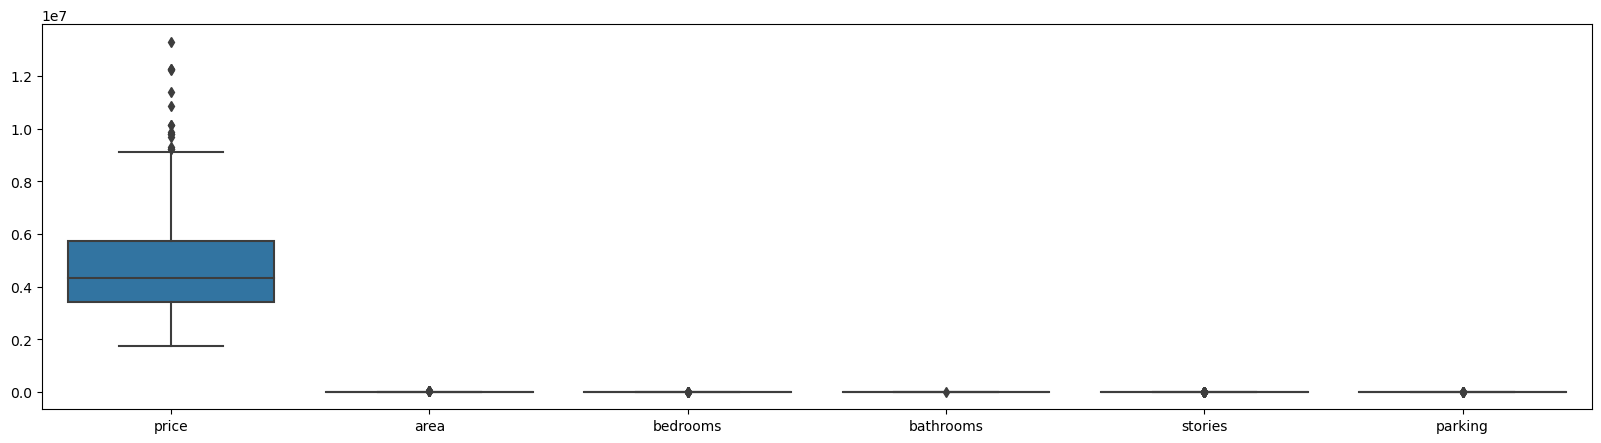

In [12]:
# outlier detection

plt.figure(figsize = (20, 5))
sns.boxplot(data = data, width = 0.8)
plt.show()

In [13]:
# plt.subplot()

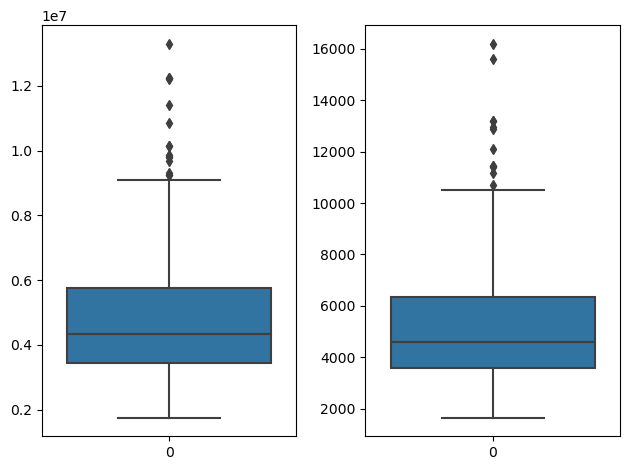

In [14]:
plt.subplot(1,2,1)
sns.boxplot(data = data['price'])
plt.subplot(1,2,2)
sns.boxplot(data = data['area'])
plt.tight_layout()
plt.show()


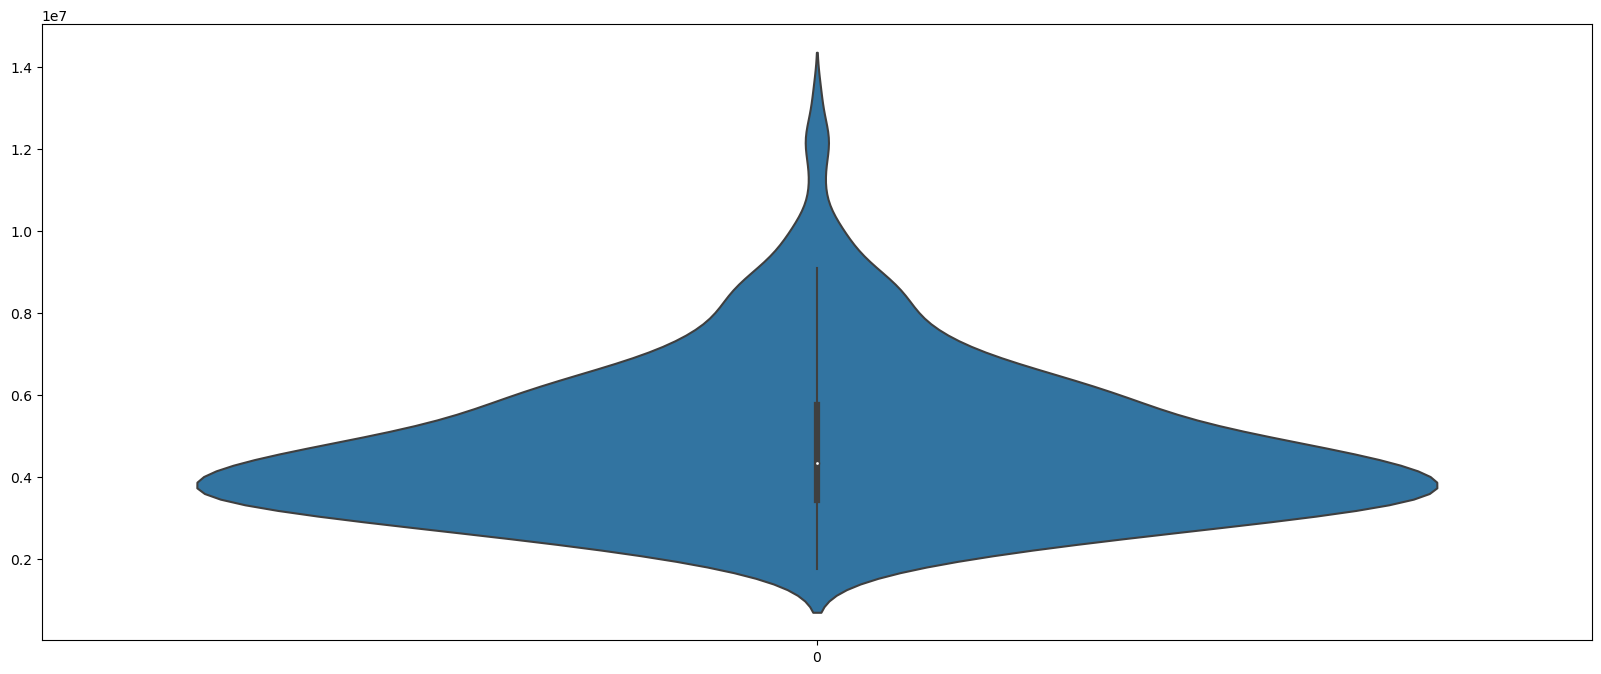

In [15]:
# outlier detection

plt.figure(figsize = (20, 8))
sns.violinplot(data = data['price'])
plt.show()

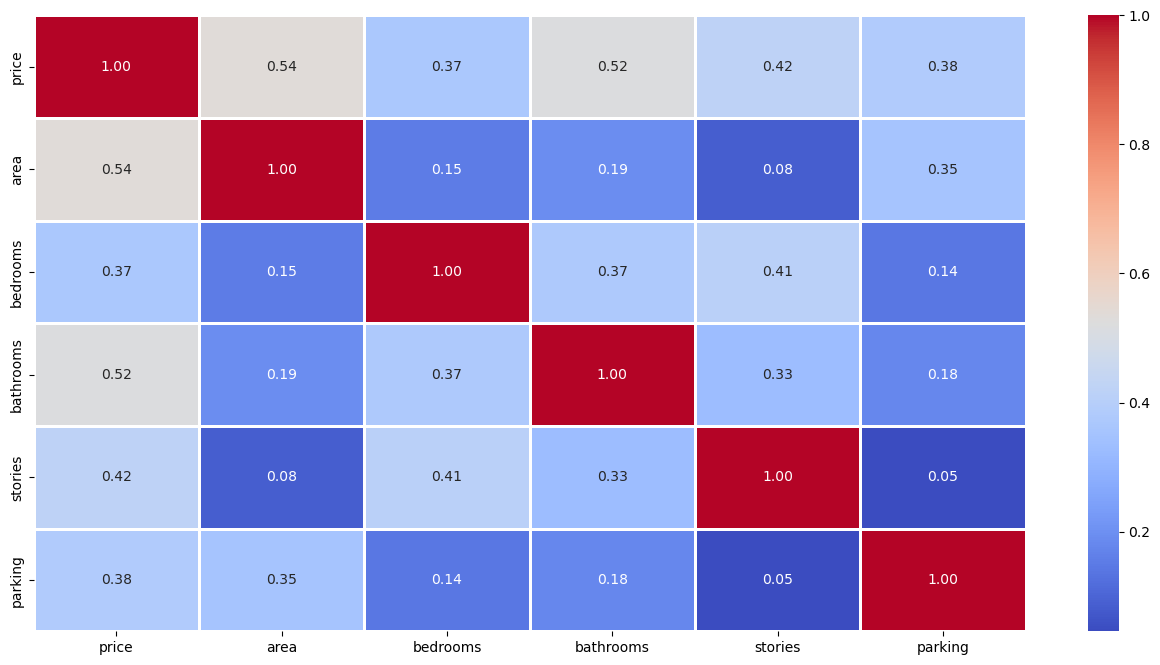

In [16]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(data.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")
plt.show()

In [17]:
# After the basic EDA, before doing any manipulations, make sure to divide the data into train and test

In [18]:
train, test = train_test_split(data, test_size = 0.2, random_state=10)

In [19]:
type(train)

pandas.core.frame.DataFrame

In [20]:
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
443,3220000,4320,3,1,1,no,no,no,no,no,1,no,unfurnished
323,4025000,5400,3,1,1,yes,no,no,no,no,3,no,semi-furnished
157,5495000,2817,4,2,2,no,yes,yes,no,no,1,no,furnished
231,4690000,4320,3,1,1,yes,no,no,no,no,0,yes,semi-furnished
351,3780000,3600,2,1,1,yes,no,no,no,no,0,no,semi-furnished


In [21]:
train.shape, test.shape

((436, 13), (109, 13))

In [22]:
# Treatment of Missing values

# Let's replace everything with Median. Why not mean?

# (data.isnull().sum() > 0).index
# Taking out the names of the columns which have missing values
missing_list = list(data.isnull().sum()[data.isnull().sum() > 0].index)

In [23]:
type(data.isnull().sum())

pandas.core.series.Series

In [24]:
missing_list

[]

In [25]:
for col in missing_list:
  median = train[col].median()
  train[col].fillna(median, inplace=True)

  test[col].fillna(median, inplace=True)

In [26]:
train.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [27]:
test.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [28]:
# Analysis based on Correlation - We can decide to drop a few features like RAD or TAX as they are highly
# correlated

In [29]:
# A glimpse of Outlier Treatment

# data['CRIM'].min(), data['CRIM'].max()

In [30]:
plt.hist(data['CRIM'])
plt.show()

KeyError: 'CRIM'

In [ ]:
data['CRIM'].quantile(0.9)

In [ ]:
data['CRIM'].quantile(0.95)

In [ ]:
data['CRIM'].quantile(0.98)

In [ ]:
# Cap the value at 25

# Replace all the values greater than 25 in this particular feature with 25
# But this depends on the use case

In [ ]:
# Just to keep it simple, we'll not do Outliers treatment and removal of features based on Corr

In [ ]:
# The range of features is different
# Let's Normalize all the features

In [ ]:
# But I don't want to Normalize my Target
# Therefore, I'll divide the data into features and target

In [ ]:
x_train = train.drop(['price'], axis=1)
y_train = train['price']

In [ ]:
x_train.shape, y_train.shape

In [ ]:
# x_train.head()

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test = test.drop(['price'], axis=1)
y_test = test['price']

In [ ]:
x_test.shape, y_test.shape

In [ ]:
# Formula of Normalization

# xnew = (xi-xmin)/(xmax-xmax)

# But if we have outliers, we should use StandardScaler instead

# xnew = xi-xmean/xstd

In [ ]:
datarange = np.array([2.4,4,3,5.6,3.2,1.8,2.34,6.23,4.44,3,76,2,87,1200,1250]).reshape((15,1))
ss = StandardScaler()
datarange_std=ss.fit_transform(datarange)

In [ ]:
datarange_std = datarange_std.flatten()
sns.distplot(datarange_std)
plt.show()

In [ ]:
datarange_std

In [ ]:
datarange_nm=normalize(datarange, axis=0,norm="max")
datarange_nm

In [ ]:
# We have a function in sklearn for this
ss = StandardScaler()
x_scaled = ss.fit_transform(x_train)

In [ ]:
type(x_scaled)

In [ ]:
x_scaled

In [ ]:
x_train_scaled = pd.DataFrame(x_scaled, columns = x_train.columns)

In [ ]:
x_train_scaled.head()

In [ ]:
x_train_scaled.describe()

In [ ]:
x_test_scaled = ss.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [ ]:
x_test_scaled.head()

In [ ]:
# Our First Model

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
pred = lr.predict(x_test_scaled)

error = mean_squared_error(y_test, pred)

In [ ]:
print(error)

In [ ]:
lr.coef_

In [ ]:
# Understanding the coeffs

In [ ]:
# Lasso Regression

ls = Lasso()
ls.fit(x_train_scaled, y_train)
pred = ls.predict(x_test_scaled)

error = mean_squared_error(y_test, pred)
print(error)

In [ ]:
ls.coef_

In [ ]:
# KNN Regressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
pred = knn.predict(x_test_scaled)

error = mean_squared_error(y_test, pred)
print(error)

In [ ]:
# Cross-Validation

# Now, we'll use train-val-test split instead of train-test split

In [ ]:
linscores = cross_validate(knn, x_train_scaled, y_train, scoring="neg_mean_squared_error", cv =5, return_estimator=True)

In [ ]:
linscores

In [ ]:
linscores['test_score']

In [ ]:
cv_score_of_model = -1* (linscores['test_score'].mean())
cv_score_of_model

In [ ]:
# Choosing the Right value of K
score = {}
for i in range(1,10):
  knncv = KNeighborsRegressor(n_neighbors=i)
  linscores = cross_validate(knncv, x_train_scaled, y_train, scoring="neg_mean_squared_error", cv =5, return_estimator=True)
  cvscore = -1* (linscores['test_score'].mean())
  score[i] = cvscore

In [ ]:
score

In [ ]:
best_k = [key for (key,value) in score.items() if value == min(score.values())][0]
best_k

In [ ]:
# Re-train the Model with k = 3

knnbest = KNeighborsRegressor(n_neighbors=3)
knnbest.fit(x_train_scaled, y_train)
pred = knnbest.predict(x_test_scaled)

error = mean_squared_error(y_test, pred)
print(error)